## Текстовое описание данных <br>



В качестве набора данных мы будем использовать набор данных по предсказанию возраста морских ушек - https://archive.ics.uci.edu/dataset/1/abalone <br>
<br>
Возраст морского ушка определяют, разрезая раковину на конус, окрашивая ее и подсчитывая количество колец под микроскопом — скучная и трудоемкая задача. Другие измерения, которые легче получить, используются для прогнозирования возраста, для экономии времени ученых.

Датасет состоит из трех файлов:
*   abalone.data - Полный набор данных для построения модели(будем использоваьт только его)
*   abalone.names - Информация о результатах анализа данного датасета
*   Index - Информация о файлах данного датасета

Файл с данными содержит следующие колонки

* Sex - M, F и I(младенец)<br>
* Length - мм Размер самой длинной оболочки<br>
* Diament - мм перпендикулярно длине<br>
* Height - мм с мясом в панцире<br>
* Whole weight-  граммы, целое морское ушко<br>
* Shucked weight - граммы, масса мяса<br>
* Viscera weight -  грамм, вес кишечника (после кровотечения) <br>
* Shell weight -  грамм после сушки<br>
* Rings - Целое число +1,5 дает возраст в годах.<br>





## Основные характеристики датасета

#### Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns

#### Загрузка данных

In [ ]:
!wget https://archive.ics.uci.edu/static/public/1/abalone.zip

--2024-02-18 07:38:25--  https://archive.ics.uci.edu/static/public/1/abalone.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘abalone.zip’

abalone.zip             [ <=>                ]  54.06K  --.-KB/s    in 0.1s    

2024-02-18 07:38:26 (418 KB/s) - ‘abalone.zip’ saved [55357]



In [ ]:
!unzip abalone.zip

Archive:  abalone.zip
  inflating: Index                   
  inflating: abalone.data            
  inflating: abalone.names           


In [ ]:
df = pd.read_csv('abalone.data',sep=',',header=None)
df.columns = ["Sex","Length","Diameter", "Height", "Whole weight",
              "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

#### Основные характеристики датасета

In [ ]:
# Первые 5 строк датасета
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.shape

(4177, 9)

In [ ]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 4177


In [ ]:
# Список колонок
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
# Список колонок с типами данных
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [ ]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Sex - 0
Length - 0
Diameter - 0
Height - 0
Whole weight - 0
Shucked weight - 0
Viscera weight - 0
Shell weight - 0
Rings - 0


In [ ]:
# Основные статистические характеристки набора данных
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
# Определим уникальные значения для целевого признака
print(sorted(df['Rings'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29]


## Визуальное исследование датасета

Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

<Axes: xlabel='Rings', ylabel='Count'>

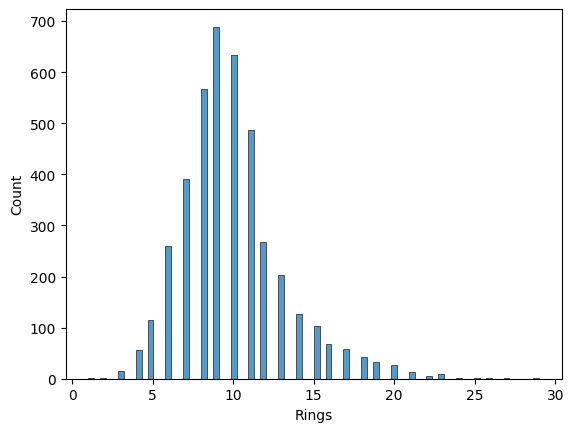

In [ ]:
sns.histplot(df['Rings'])

<Axes: xlabel='Length', ylabel='Rings'>

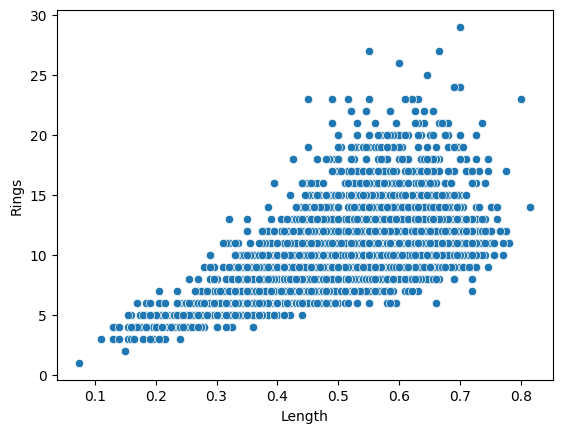

In [ ]:
sns.scatterplot(df,x='Length',y="Rings")

<Axes: xlabel='Diameter'>

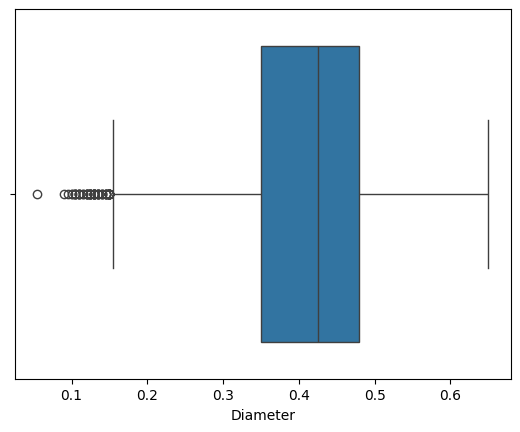

In [ ]:
sns.boxplot(x = df["Diameter"])

## Информация о корреляции признаков

In [ ]:
# Табличное представление матрицы корреляции с коэффициентом Пирсона
df.corr()

<ipython-input-38-a15434c93c98>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<ipython-input-40-345770a951cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

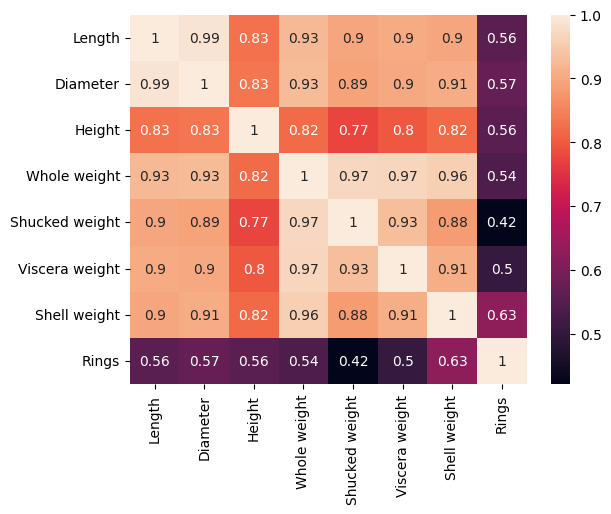

In [ ]:
# Тепловая карта
sns.heatmap(df.corr(),annot=True)

На основе корреляционной матрицы можно сделать следующие выводы:
* Целевая переменная коррелирует со всеми признаками примерно одинаково на среднем уровне(0.5-0.6)
* Переменная Whole weight очень сильно коррелирует со всеми признаками, об это мнадо помнить если предполагается использоваие линейных моделей
* Переменные Diameter и Length практически идентичны, стоит использовать только одну из них